# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import json
import joblib
import warnings

# Data Reading and Summary

In [3]:
housing= pd.read_csv('housing.csv')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [26]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.851064,0.177950,0.346228,0.042553,0.307544,0.653772,0.216634,0.245648,0.415861,0.338491
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.356370,0.382841,0.476228,0.202043,0.461923,0.843380,0.412350,0.430888,0.493347,0.473655
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
housing.shape

(545, 13)

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 15 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            517 non-null    int64
 1   area                             517 non-null    int64
 2   bedrooms                         517 non-null    int64
 3   bathrooms                        517 non-null    int64
 4   stories                          517 non-null    int64
 5   mainroad                         517 non-null    int64
 6   guestroom                        517 non-null    int64
 7   basement                         517 non-null    int64
 8   hotwaterheating                  517 non-null    int64
 9   airconditioning                  517 non-null    int64
 10  parking                          517 non-null    int64
 11  prefarea                         517 non-null    int64
 12  furnishingstatus_furnished       517 non-null    

# Data Cleaning

In [6]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Visualization

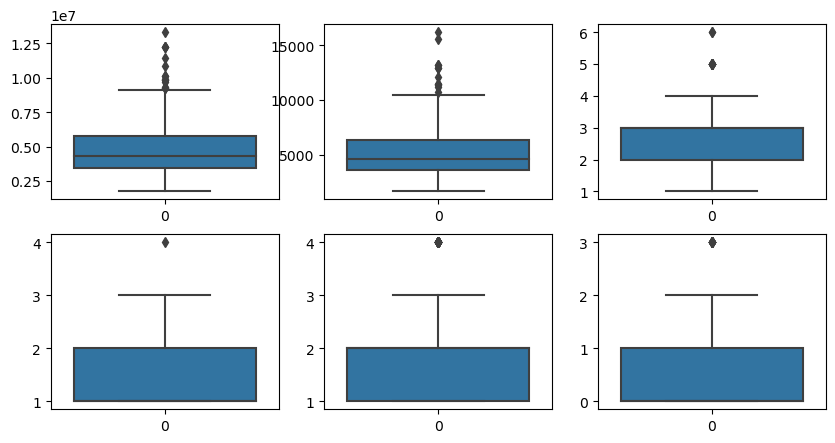

In [8]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

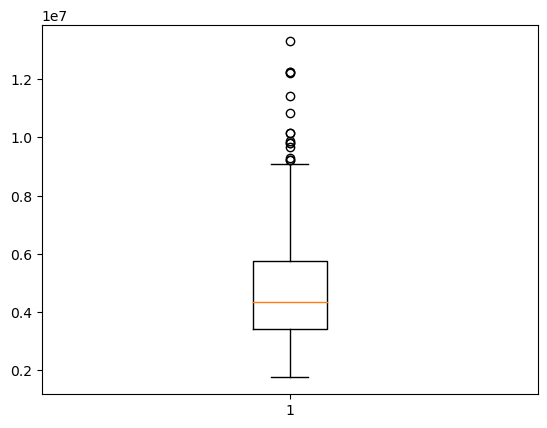

In [9]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

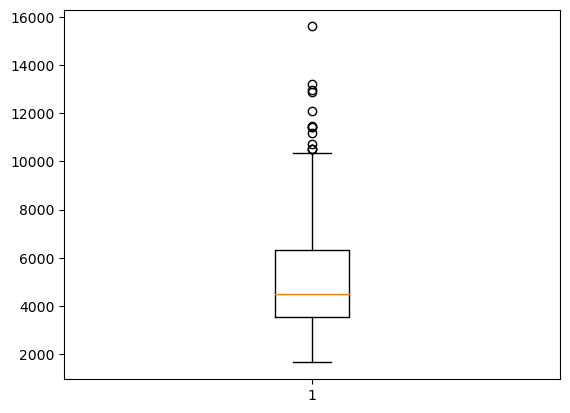

In [10]:
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

# Transformation

In [11]:


varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

In [12]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [13]:
housing = pd.get_dummies(housing, columns=['furnishingstatus'])


In [15]:
housing.to_csv('unnormalized.csv', index= False)
housing


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


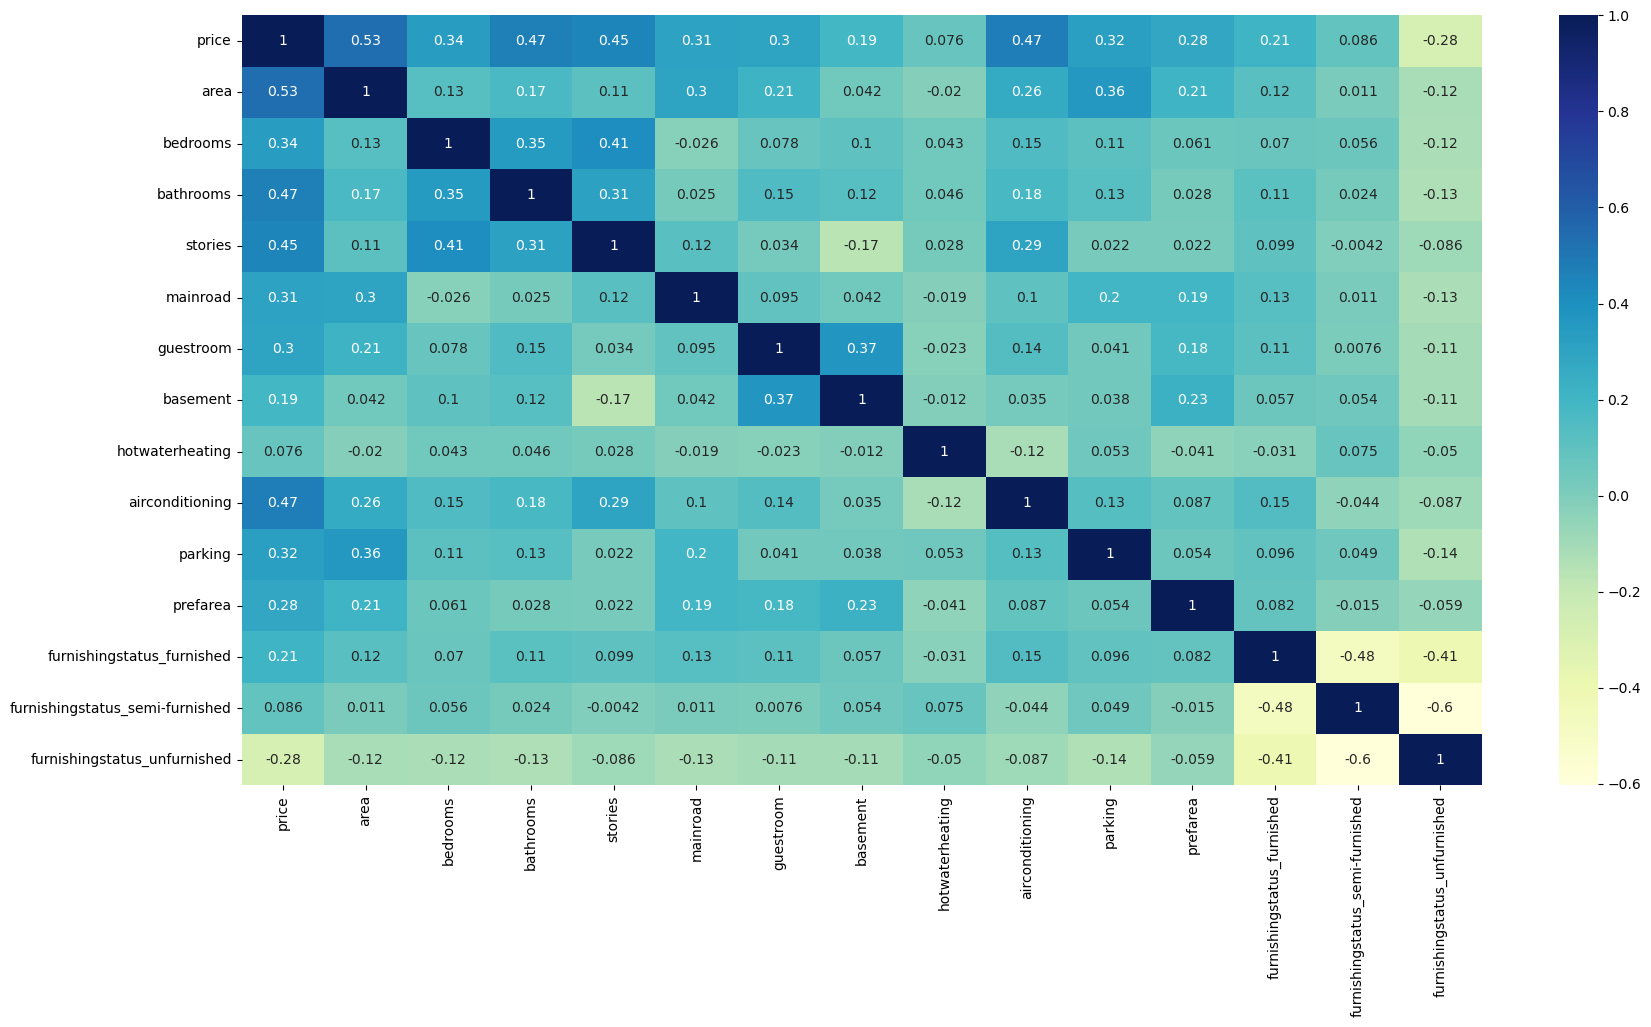

In [16]:
plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
X = housing.drop('price', axis=1)
y = housing['price']
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

In [18]:
X_normalized

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.499426,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0,0.0
1,0.568312,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0
2,0.786452,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.0
3,0.338691,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.0
4,0.547646,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.154994,0.2,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0
513,0.086108,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
514,0.226177,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
515,0.144661,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0


# Model Trainign & Testing

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.30, random_state=42)
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
ridge = Ridge(alpha=0.9) 
ridge.fit(X_train_pca, y_train)
y_pred = ridge.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
joblib.dump(ridge,'LR_model.joblib')
joblib.dump(pca.components_,'pca_components.joblib')
rmse = np.sqrt(mse)
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.66
Mean Absolute Error: 770526.93
Mean Squared Error: 994271719806.20
Root Mean Squared Error: 997131.75


# Model Prediction

In [24]:
new_data = {
    'area': 6000,
    'bedrooms': 4,
    'bathrooms': 1,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 0,
    'parking': 2,
    'prefarea': 0,
    'furnishingstatus_furnished': 0,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

new_input_data = pd.DataFrame([new_data])
loaded_scaler = joblib.load('scaler.joblib')
lr=joblib.load('LR_model.joblib')
loaded_pca_components = joblib.load('pca_components.joblib')
new_input_data_normalized = loaded_scaler.transform(new_input_data)
new_input_data_pca = np.dot(new_input_data_normalized, loaded_pca_components.T)
predicted_price = lr.predict(new_input_data_pca)
print(f'Predicted House Price: {predicted_price[0]:.2f}')

Predicted House Price: 7345982.56
